In [2]:
from pathlib import Path
import xarray as xr

In [8]:
Path.cwd() / "nba_draft_measurements.nc"

WindowsPath('c:/Users/com/Desktop/outta/2주차/nba_draft_measurements.nc')

In [7]:
# xarray 라이브러리를 이용하여 NetCDF-4 파일을 xarray-Dataset으로 불러오기
draft_data = xr.load_dataset(Path.cwd() / "nba_draft_measurements.nc")

# 데이터셋 보이기
draft_data

<xarray.Dataset>
Dimensions:            (names: 70)
Coordinates:
  * names              (names) object 'Nickeil Alexander-Walker' ... 'Dylan W...
Data variables:
    position           (names) object 'SG' 'C' 'PF' 'C' ... 'PG' 'SF' 'PF' 'SF'
    height_no_shoes    (names) float64 76.25 80.75 79.75 ... 78.25 77.75 78.25
    height_with_shoes  (names) float64 77.5 82.0 81.0 86.5 ... 79.75 79.5 79.5
    weight             (names) float64 203.8 239.0 208.4 ... 208.8 240.2 195.8
    wingspan           (names) float64 81.5 87.5 84.0 91.0 ... 82.75 81.75 82.0
    standing_reach     (names) float64 102.0 109.5 107.0 ... 103.0 104.5 104.5
    body_fat_prcnt     (names) float64 5.9 8.5 3.6 7.1 5.0 ... 4.3 4.9 5.4 4.6
    hand_length        (names) float64 8.5 9.25 9.0 9.25 ... 7.75 8.5 9.0 8.25
    hand_width         (names) float64 8.75 9.5 9.75 9.5 ... 9.0 9.5 10.5 9.5
Attributes:
    length-units:  inches
    weight-units:  pounds
    readme:        \nDescribes various measurements of athletes who participa...
    url:           https://www.nbadraft.net/2019-nba-draft-combine-measurements/

In [22]:
# 신발에 의해 추가된 키의 평균과 표준편차를 계산

# 여기에 코드 작성
avg_height_added = xr.DataArray.mean(height_added)
std_height_added = xr.DataArray.std(height_added)
print(avg_height_added)
# print(std_height_added)

<xarray.DataArray ()>
array(1.38571429)


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

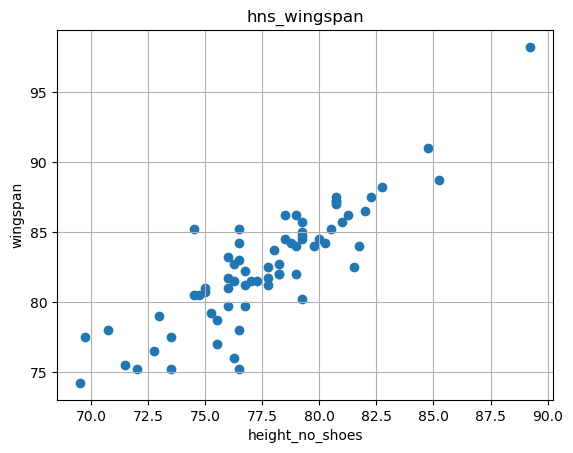

In [30]:
# 윙스팬 vs 키 산점도 그리기

# 여기에 코드 작성
fig, ax = plt.subplots()
x = draft_data.height_no_shoes.data
y = draft_data.wingspan.data
ax.scatter(x, y)
ax.set_xlabel('height_no_shoes')
ax.set_ylabel('wingspan')
ax.set_title('hns_wingspan')
ax.grid()

In [37]:
import numpy as np

def ordinary_least_squares(x, y):
    
    # 여기에 코드 작성
    len_ = len(x)
    # 1주차의 최소제곱추정량 사용 
    m = (np.sum(np.dot(x, y)) - (np.sum(x)*np.sum(y)/len_)) / ((np.sum(x**2)) - ((np.sum(x))**2/len_))
    b = np.mean(y) - m * np.mean(x)
    
    return m, b

1.0269361143266387 2.8045506927401505


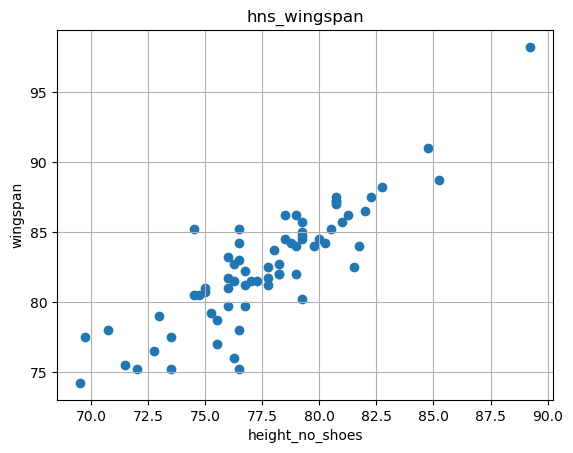

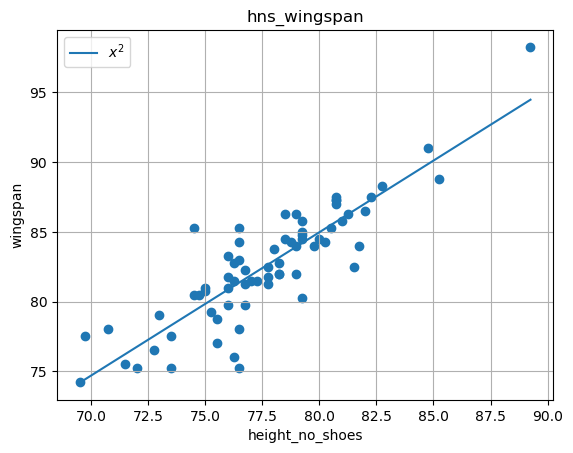

In [39]:
# 윙스팬 vs 키 산점도 그리기 (복습)

# 여기에 코드 작성
fig, ax = plt.subplots()
x = draft_data.height_no_shoes.data
y = draft_data.wingspan.data
ax.scatter(x, y)
ax.set_xlabel('height_no_shoes')
ax.set_ylabel('wingspan')
ax.set_title('hns_wingspan')
ax.grid()

# 윙스팬, 키 데이터 각각 접근하여 numpy.ndarray로 변환한 후 m*, b* 구하기

# 여기에 코드 작성
x = draft_data.height_no_shoes.data
y = draft_data.wingspan.data

m, b = ordinary_least_squares(x, y)
print(m, b)


# ax.plot() 함수 사용하여 그래프 그리기
# x의 정의역 데이터 속 키의 최솟값과 최댓값 사이의 구간으로 잡기
# 구간을 1000개 정도로 나누면 충분함

# 여기에 코드 작성
fig, ax = plt.subplots()
x = draft_data.height_no_shoes.data
y = draft_data.wingspan.data

ax.scatter(x, y)
t = np.linspace(np.min(x), np.max(x), 1000)
ax.plot(t, m * t + b, label="$x^2$")

ax.set_xlabel('height_no_shoes')
ax.set_ylabel('wingspan')
ax.set_title('hns_wingspan')
ax.grid()

# 범례로 들어갈 그래프의 label들을 자동으로 생성해주는 함수
ax.legend()